In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
import random

#The main library of interest from scipy that implements several interpolation algorithms
from scipy.interpolate import interp1d, lagrange

In [57]:
# Use the following code to determine the location of the matplotlib documentation specifically conserning matplor rcParams

# import matplotlib
# f = matplotlib.matplotlib_fname()
# print(f)

/home/khai/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [102]:
# CONFIG Matplotlib Parameters
themes = ['default', 'classic', 'bmh', 'dark_background', 'fast']
plt.style.use('classic')                        # theme (use "plt.style.available" method to find out available themes)
plt.rcParams["figure.figsize"] = (17,11.5)      # figure size
plt.rcParams["font.size"] = 12                  # font size
plt.rcParams["text.color"] = "black"            # text color



In [103]:
def getRandomPoints(x_, y_, rand=0.7):
    """
    Goal:
        produce a subset of points from 2 arrays representing the x and y values of a function
    Inputs:
        x_ - an array of x values
        y_ - an array of y values
        rand - how many random values to select
    Output:
        x_, y_ - a subset of x and y values
    Note: 
        the first x value and last x value, that is the end points of the x interval [a,b] must be included in the random set
        for the interpolation function to work properly in the region [a,b]
    """

    random.seed()
    x_rand = []
    y_rand = []
    for i in range(len(x_)):
        if (i == 0 or i == len(x_) - 1 or random.random()>rand):
            x_rand.append(x_[i])
            y_rand.append(y_[i])
    
    return [x_rand, y_rand]

def calculateError(y_, y_pred):
    """
    Goal: given a predicted function find the RSS and the r^2 values to gauge accuracy of your model
    Inputs:
        y_      - "true" y values
        y_pred  - predicted y values
    Output:
        r^2 -   ration of explained sum of squares to total sum squared (i.e. 1 - RSS/TSS)
    """
    RSS = 0
    TSS = 0
    y_mean = np.mean(y_)
    for i in range(len(y_)):
        RSS += (y_pred[i] - y_[i])**2
        TSS += (y_pred[i] - y_mean)**2
    
    return (1 - RSS/TSS)

In [113]:
def interpolate(x_, y_):
    """ A function that interpolates the data using 3 main methods:
    i. linear
    ii. quadratic
    iii. cubic
    interpolations

    Inputs:
        x: x values
        y: y values of a function
    """

    #First Choose some random points
    x_rand, y_rand = getRandomPoints(x_, y_)

    #Apply linear, quadratic and cubic interpolation
    f1 = interp1d(x_rand, y_rand, kind='linear')(x_vals)
    f2 = interp1d(x_rand, y_rand, kind='quadratic')(x_vals)
    f3 = interp1d(x_rand, y_rand, kind='cubic')(x_vals)

    #Plot
    plt.plot(x_, y_, zorder=20, label='y=x^2')
    plt.plot(x_, f1, '-^')
    plt.plot(x_, f2, '--')
    plt.plot(x_, f3, '.')
    plt.legend(['original function' , 'linear', 'quadratic', 'cubic'], loc='best')
    plt.show()

    #Calculate r^2 error
    r_lin = calculateError(y_, f1)
    r_quad = calculateError(y_, f2)
    r_cube = calculateError(y_, f3)
    print("\nR-squared Error")
    print(f"Linear: {r_lin}")
    print(f"Quadratic: {r_quad}")
    print(f"Cubic: {r_cube}")

## Create Function Data

In [109]:
#Define the interval of interest
x_vals = np.linspace(0.1,3,100)

#Choose noise level for the data
noise = 0.1

#Quadratic function with noise
y_quad = [x**2 + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

#Logarithmic function with noise
y_log = [np.log(x) + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

#Trigonometric function with noise
y_trig = [np.cos(x) + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]


## Now Interpolate using helper function

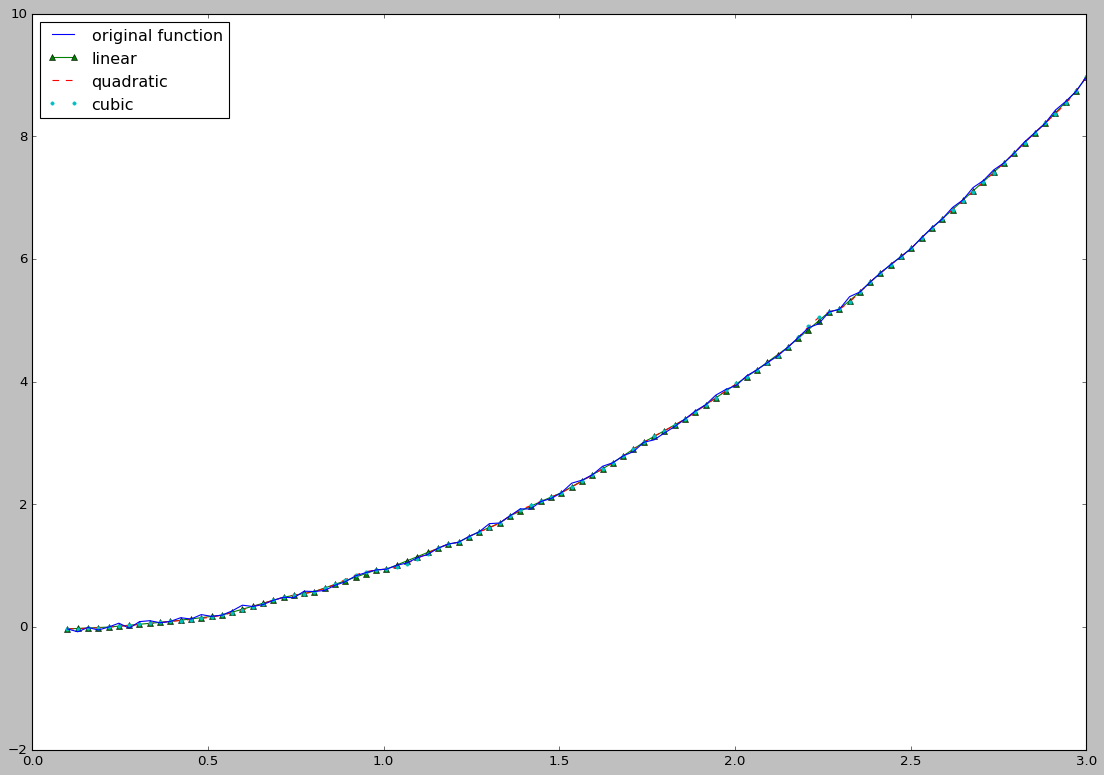


R-squared Error
Linear r^2: 0.999902786046125
Quadratic r^2: 0.9998731226751948
Cubic r^2: 0.9998717917359542


In [112]:
#Quadratic function
interpolate(x_vals, y_quad)

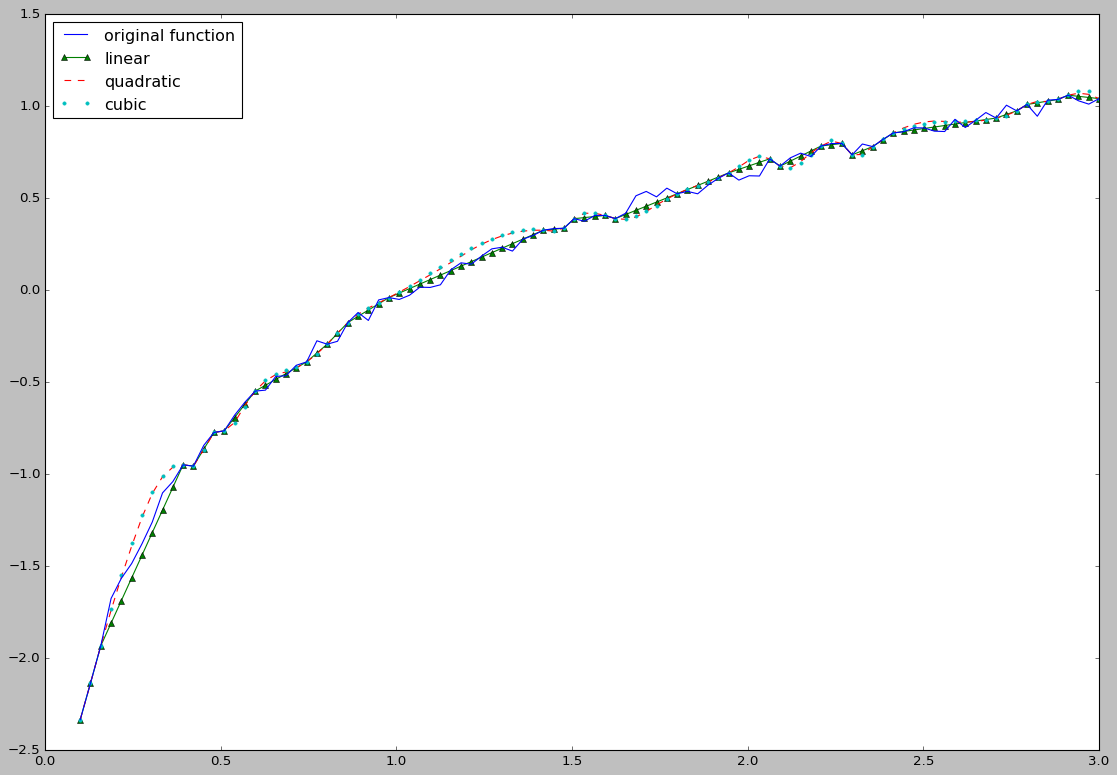

Linear r^2:  0.9980413131018576
Quadratic r^2:  0.9962343546032817
Cubic r^2:  0.9957904464784212


In [92]:
#Logarithmic function
interpolate(x_vals, y_log)

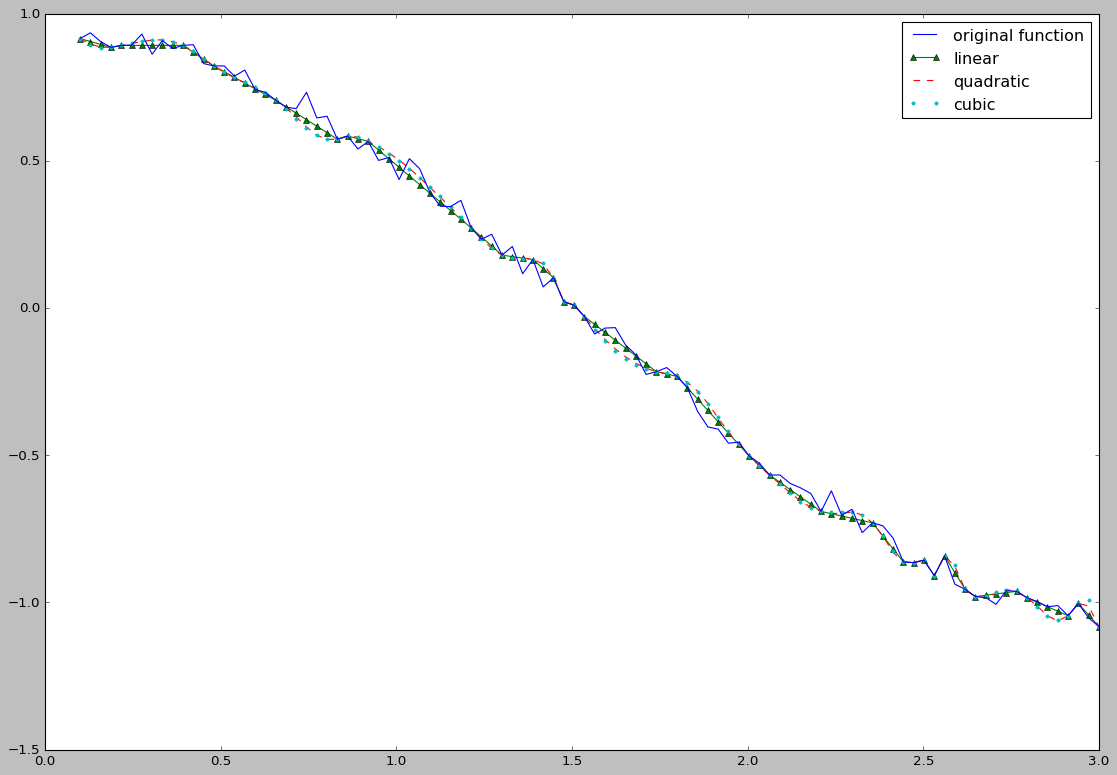

Linear r^2:  0.9983878648766509
Quadratic r^2:  0.9974945071279899
Cubic r^2:  0.9973862465903569


In [89]:
#Trigonometric function
interpolate(x_vals, y_trig)